## Analysis of WorldRisk Report data
### Data source: https://www.kaggle.com/datasets/tr1gg3rtrash/global-disaster-risk-index-time-series-dataset

#### In this project we analyzed the vulnerability and susceptibility of each country to climate and non-climate disasters, in order to identify where they should invest more money to cope better with the consequences of it. We will be analyzing data from 2011 to 2021 to determine the disaster risk trend for each country, performing some predictive analytics to determine the probability of future disasters. We also created an interactive map to help visualize the distribution of past disasters.

**This analysis was part of a group project during a SCQF level 8 course at Edinburgh College.  
On this project I was responsable for cleaning the data, analysing the WRI and creating the maps.**

#### Source of ISO dataframe:

https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes

In [1]:
import pandas as pd
import numpy as np

**Taking a first look at the World Risk Index dataframe and sorting values by Region:**

In [2]:
df1 = pd.read_csv(r"world_risk_index.csv")

df1_sorted = df1.sort_values('Region')

df1_sorted

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
1440,Afghanistan,9.79,13.17,74.32,56.63,92.07,74.26,2012,Medium,High,Very High,Very High
908,Afghanistan,9.69,13.17,73.61,56.21,92.82,71.81,2017,Medium,High,Very High,Very High
750,Afghanistan,8.18,12.27,66.63,48.57,91.40,59.93,2021,Medium,High,Very High,Very High
1608,Afghanistan,10.45,15.48,67.53,49.23,91.64,61.71,2018,High,Very High,Very High,Very High
211,Afghanistan,9.93,13.17,75.41,56.67,93.44,76.11,2013,Medium,High,Very High,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...
143,Österreich,3.41,13.40,25.48,13.85,37.52,25.06,2011,Medium,Very Low,Very Low,Very Low
1193,Österreich,2.87,13.18,21.75,13.63,39.27,12.34,2019,Medium,Very Low,NaN,Very Low
477,Österreich,3.61,13.60,26.53,14.91,37.23,27.47,2015,Medium,Low,Very Low,Very Low
1001,Österreich,3.63,13.60,26.65,14.26,36.81,28.88,2017,Medium,Low,Very Low,Very Low


**Creating the ISO dataframe with the table from Wikipedia (above):**

In [3]:
df2 = pd.read_csv(r"ISO_countries.csv")

df2

,Country name[5],Official state name[6][a],Sovereignty[6][7][8],Alpha-2 code[5],Alpha-3 code[5],Numeric code[5],Subdivision code links[3],Internet ccTLD[9],German Country name,German Official state name
0,Åland Islands,Åland,Finland,AX,ALA,248.0,ISO 3166-2:AX,.ax,Åland-Inseln,Ein Land
1,Albania,The Republic of Albania,UN member state,AL,ALB,8.0,ISO 3166-2:AL,.al,Albanien,Die Republik Albanien
2,Algeria,The People's Democratic Republic of Algeria,UN member state,DZ,DZA,12.0,ISO 3166-2:DZ,.dz,Algerien,Die Demokratische Volksrepublik Algerien
3,American Samoa,The Territory of American Samoa,United States,AS,ASM,16.0,ISO 3166-2:AS,.as,Amerikanischen Samoa-Inseln,Das Territorium von Amerikanisch-Samoa
4,Andorra,The Principality of Andorra,UN member state,AD,AND,20.0,ISO 3166-2:AD,.ad,Andorra,Das Fürstentum Andorra
...,...,...,...,...,...,...,...,...,...,...
249,Wallis and Futuna,The Territory of the Wallis and Futuna Islands,France,WF,WLF,876.0,ISO 3166-2:WF,.wf,Wallis und Futuna,Das Territorium der Wallis- und Futuna-Inseln
250,Western Sahara [aj],The Sahrawi Arab Democratic Republic,Disputed [ak],EH,ESH,732.0,ISO 3166-2:EH,[al],Westsahara [auch],Die Demokratische Arabische Republik Sahara
251,Yemen,The Republic of Yemen,UN member state,YE,YEM,887.0,ISO 3166-2:YE,.ye,Jemen,Die Republik Jemen
252,Zambia,The Republic of Zambia,UN member state,ZM,ZMB,894.0,ISO 3166-2:ZM,.zm,Sambia,Die Republik Sambia


**Cleaning ISO dataframe:**

- Renaming columns to be easier to understand
- Removing columns that we won't use
- Removing empty rows

In [4]:
df2_renamed = df2.rename(columns={'Country name[5]':'Country name', 
                                  'Alpha-3 code[5]':'Alpha-3 code'})

df2_clean = df2_renamed.drop(columns =['Alpha-2 code[5]', 'Numeric code[5]', 'Subdivision code links[3]','Internet ccTLD[9]', 
                                       'Sovereignty[6][7][8]',
                                       'Official state name[6][a]',
                                      'German Official state name'])

df2_clean
df2_clean = df2_clean.dropna()

df2_clean

,Country name,Alpha-3 code,German Country name
0,Åland Islands,ALA,Åland-Inseln
1,Albania,ALB,Albanien
2,Algeria,DZA,Algerien
3,American Samoa,ASM,Amerikanischen Samoa-Inseln
4,Andorra,AND,Andorra
...,...,...,...
249,Wallis and Futuna,WLF,Wallis und Futuna
250,Western Sahara [aj],ESH,Westsahara [auch]
251,Yemen,YEM,Jemen
252,Zambia,ZMB,Sambia


**Checking if there is anything in front/after the name of the countries because the table on Wikipedia had flags in it:**

In [5]:
list(df2_clean['Country name'])

['\xa0Åland Islands',
 '\xa0Albania',
 '\xa0Algeria',
 '\xa0American Samoa',
 '\xa0Andorra',
 '\xa0Angola',
 '\xa0Anguilla',
 '\xa0Antarctica\u200a[b]',
 '\xa0Antigua and Barbuda',
 '\xa0Argentina',
 '\xa0Armenia',
 '\xa0Aruba',
 '\xa0Australia\u200a[c]',
 '\xa0Austria',
 '\xa0Azerbaijan',
 '\xa0Bahamas (the)',
 '\xa0Bahrain',
 '\xa0Bangladesh',
 '\xa0Barbados',
 '\xa0Belarus',
 '\xa0Belgium',
 '\xa0Belize',
 '\xa0Benin',
 '\xa0Bermuda',
 '\xa0Bhutan',
 '\xa0Bolivia (Plurinational State of)',
 '\xa0Bonaire',
 '\xa0Bosnia and Herzegovina',
 '\xa0Botswana',
 '\xa0Bouvet Island',
 '\xa0Brazil',
 '\xa0British Indian Ocean Territory (the)',
 '\xa0Brunei Darussalam\u200a[f]',
 '\xa0Bulgaria',
 '\xa0Burkina Faso',
 '\xa0Burundi',
 '\xa0Cabo Verde\u200a[g]',
 '\xa0Cambodia',
 '\xa0Cameroon',
 '\xa0Canada',
 '\xa0Cayman Islands (the)',
 '\xa0Central African Republic (the)',
 '\xa0Chad',
 '\xa0Chile',
 '\xa0China',
 '\xa0Christmas Island',
 '\xa0Cocos (Keeling) Islands (the)',
 '\xa0Colombia',
 

**I used Regex to remove the special characters from the string:**

In [6]:
#list(t.strip() for t in df2_clean['Country name'])

import re
#Country = list(re.match('\xa0([\w \()]+)', t).group(1) for t in df2_clean['Country name'])
Country = []
for t in df2_clean['Country name']:
    match = re.match("\xa0([\w \()'-]+)", t)
    if match is None:
        print(f'error: "{t}"')
        Country.append(None)
    else:
        Country.append(match.group(1))
Country

['Åland Islands',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas (the)',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bonaire',
 'Bosnia and Herzegovina',
 'Botswana',
 'Bouvet Island',
 'Brazil',
 'British Indian Ocean Territory (the)',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands (the)',
 'Central African Republic (the)',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Cocos (Keeling) Islands (the)',
 'Colombia',
 'Comoros (the)',
 'Congo (the Democratic Republic of the)',
 'Congo (the)',
 'Cook Islands (the)',
 'Costa Rica',
 "Côte d'Ivoire",
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 '

**Checking if the German countries also have special characters:**

In [7]:
list(df2_clean['German Country name'])

['\xa0Åland-Inseln',
 '\xa0Albanien',
 '\xa0Algerien',
 '\xa0Amerikanischen Samoa-Inseln',
 '\xa0Andorra',
 '\xa0Angola',
 '\xa0Anguilla',
 '\xa0Antarktis\xa0\u200a[b]',
 '\xa0Antigua und Barbuda',
 '\xa0Argentinien',
 '\xa0Armenien',
 '\xa0Aruba',
 '\xa0Australien\xa0\u200a[c]',
 '\xa0Österreich',
 '\xa0Aserbaidschan',
 '\xa0Bahamas (die)',
 '\xa0Bahrein',
 '\xa0Bangladesch',
 '\xa0Barbados',
 '\xa0Weißrussland',
 '\xa0Belgien',
 '\xa0Belize',
 '\xa0Benin',
 '\xa0Bermudas',
 '\xa0Bhutan',
 '\xa0Bolivien (plurinationaler Staat)',
 '\xa0Bonaire\xa0Sint Eustatius\xa0Saba',
 '\xa0Bosnien und Herzegowina',
 '\xa0Botswana',
 '\xa0Bouvet-Insel',
 '\xa0Brasilien',
 '\xa0Britisches Territorium im Indischen Ozean (das)',
 '\xa0Brunei Darussalam\xa0\u200a[f]',
 '\xa0Bulgarien',
 '\xa0Burkina Faso',
 '\xa0Burundi',
 '\xa0Cabo Verde\xa0\u200a[g]',
 '\xa0Kambodscha',
 '\xa0Kamerun',
 '\xa0Kanada',
 '\xa0Kaimaninseln (die)',
 '\xa0Zentralafrikanische Republik (die)',
 '\xa0Tschad',
 '\xa0Chile',
 '\

**Cleaning German countries as above:**

In [8]:
German_Country = list(re.match("\xa0([\w \()'-]+)", t).group(1) for t in df2_clean['German Country name'])

German_Country

['Åland-Inseln',
 'Albanien',
 'Algerien',
 'Amerikanischen Samoa-Inseln',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarktis',
 'Antigua und Barbuda',
 'Argentinien',
 'Armenien',
 'Aruba',
 'Australien',
 'Österreich',
 'Aserbaidschan',
 'Bahamas (die)',
 'Bahrein',
 'Bangladesch',
 'Barbados',
 'Weißrussland',
 'Belgien',
 'Belize',
 'Benin',
 'Bermudas',
 'Bhutan',
 'Bolivien (plurinationaler Staat)',
 'Bonaire',
 'Bosnien und Herzegowina',
 'Botswana',
 'Bouvet-Insel',
 'Brasilien',
 'Britisches Territorium im Indischen Ozean (das)',
 'Brunei Darussalam',
 'Bulgarien',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Kambodscha',
 'Kamerun',
 'Kanada',
 'Kaimaninseln (die)',
 'Zentralafrikanische Republik (die)',
 'Tschad',
 'Chile',
 'China',
 'Weihnachtsinsel',
 'Kokos-(Keeling-)Inseln (die)',
 'Kolumbien',
 'Komoren (die)',
 'Kongo (die Demokratische Republik)',
 'Kongo (der)',
 'Cookinseln (die)',
 'Costa Rica',
 'Elfenbeinküste',
 'Kroatien',
 'Kuba',
 'Curacao',
 'Zypern',
 'Tsche

**Adding clean names to the original dataframe of ISO:**

In [9]:
df2_clean['German Country name'] = German_Country
df2_clean['Country name'] = Country

df2_clean

,Country name,Alpha-3 code,German Country name
0,Åland Islands,ALA,Åland-Inseln
1,Albania,ALB,Albanien
2,Algeria,DZA,Algerien
3,American Samoa,ASM,Amerikanischen Samoa-Inseln
4,Andorra,AND,Andorra
...,...,...,...
249,Wallis and Futuna,WLF,Wallis und Futuna
250,Western Sahara,ESH,Westsahara
251,Yemen,YEM,Jemen
252,Zambia,ZMB,Sambia


**I had 11 rows extra on my table when I merged, so I had to check if there were duplicates:**

In [10]:
df2_clean['Country name'].value_counts()

#checking why i have 11 rows more than i should when i join the dataframes

#four countries have two different codes

#Congo              2
#Virgin Islands     2
#Korea              2
#Guinea             2

Åland Islands    1
Panama           1
New Caledonia    1
New Zealand      1
Nicaragua        1
                ..
Guadeloupe       1
Guam             1
Guatemala        1
Guernsey         1
Zimbabwe         1
Name: Country name, Length: 249, dtype: int64

**Separating my ISO dataframe in 2, English names and German names:**

In [11]:
d = {'Country name': df2_clean['Country name'], 'Alpha-3 code': df2_clean['Alpha-3 code']}
df_en = pd.DataFrame(data=d)

df_en

d2= {'Country name': df2_clean['German Country name'], 'Alpha-3 code': df2_clean['Alpha-3 code']}

df_de = pd.DataFrame(data=d2)

df_de

,Country name,Alpha-3 code
0,Åland-Inseln,ALA
1,Albanien,ALB
2,Algerien,DZA
3,Amerikanischen Samoa-Inseln,ASM
4,Andorra,AND
...,...,...
249,Wallis und Futuna,WLF
250,Westsahara,ESH
251,Jemen,YEM
252,Sambia,ZMB


**Concatenating these two dataframes so I can have only two columns:**

In [12]:
result = pd.concat([df_en, df_de], ignore_index=True)

**Removing duplicates as some German names are the same in English:**

In [13]:
result = result.drop_duplicates()

In [14]:
result

,Country name,Alpha-3 code
0,Åland Islands,ALA
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND
...,...,...
492,Jungferninseln (USA),VIR
493,Wallis und Futuna,WLF
494,Westsahara,ESH
495,Jemen,YEM


**Merging World Index dataframe with ISO dataframe:**

In [15]:
df_tog = df1_sorted.merge(result, how='left', left_on='Region', right_on='Country name')

**Checking for null values on the code, it shouldn't be any:**

In [16]:
y = df_tog[df_tog['Alpha-3 code'].isnull()]

**Getting a list of the countries that showed as null above:** 

In [17]:
for c in y['Region'].unique():
    print(c)

Bahamas
Bolivia
Bolivien
Botsuana
Cape Verde
Central African Republic
Comoros
Congo
Cote d'Ivoire
Czech Republic
Demokratische Rep. Kongo
Dominican Republic
Dominikanische Republik
Föd. Staaten v. Mikronesien
Föd. Staaten von Mikronesien
Gambia
Georgien
Iran
Kap Verde
Kirgisistan
Komoren
Kongo
Korea Republic of
Korea Republic of 4.59
Lao People's Democ. Republic
Lao People's Democratic Republic
Laos
Libyan Arab Jamahiriya
Mazedonien
Moldau
Moldawien
Mongolien
Netherlands
Niederlande
Niger
Papua-Neuguinea
Philippinen
Philippines
Republic of Macedonia
Republic of Moldova
Romänien
Russia
Russische Föderation
Salomonen
Simbabwe
St. Lucia
St. Vincent u. d. Grenadinen
St. Vincent u. die Grenadinen
St. Vincent und d. Grenadinen
Sudan
Swasiland
Swaziland
Syrian Arab Republic
Syrien
São Tomé and Príncipe
São Tomé und Príncipe
Südkorea
T. f. Yugo. Rep. of Macedonia
Tschechische Republik
Turkey
United Arab Emirates
United Kingdom
United Republic of Tanzania
United States
Venezuela
Ver. Arabische 

**I then created a excel document where I matched manually each missing country with the proper Alpha code:**

In [18]:
df3 = pd.read_csv(r"countries_dup.csv")

df3

,Country name,Alpha-3 code
0,Bahamas,BHS
1,Bolivia,BOL
2,Bolivien,BOL
3,Botsuana,BWA
4,Cape Verde,CPV
...,...,...
69,Vereinigte Staaten v. A.,USA
70,Vereinigte Staaten von Amerika,USA
71,Vereinigtes Königreich,GBR
72,Zentralafrik. Republik,CAF


**Added the missing countries on the previous dataframe:**

In [19]:
countries_codes = pd.concat([result, df3], ignore_index=True)

countries_codes

,Country name,Alpha-3 code
0,Åland Islands,ALA
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND
...,...,...
481,Vereinigte Staaten v. A.,USA
482,Vereinigte Staaten von Amerika,USA
483,Vereinigtes Königreich,GBR
484,Zentralafrik. Republik,CAF


**Merging again, properly clean and confirming by checking for nulls:**

In [20]:
df_tog = df1_sorted.merge(countries_codes, how='left', left_on='Region', right_on='Country name')

df_tog[df_tog['Alpha-3 code'].isnull()] #proving there is no nulls

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category,Country name,Alpha-3 code


In [21]:
df_tog = df_tog.rename(columns={' Lack of Adaptive Capacities':'Lack of Adaptive Capacities'})

df_tog

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category,Country name,Alpha-3 code
0,Afghanistan,9.79,13.17,74.32,56.63,92.07,74.26,2012,Medium,High,Very High,Very High,Afghanistan,AFG
1,Afghanistan,9.69,13.17,73.61,56.21,92.82,71.81,2017,Medium,High,Very High,Very High,Afghanistan,AFG
2,Afghanistan,8.18,12.27,66.63,48.57,91.40,59.93,2021,Medium,High,Very High,Very High,Afghanistan,AFG
3,Afghanistan,10.45,15.48,67.53,49.23,91.64,61.71,2018,High,Very High,Very High,Very High,Afghanistan,AFG
4,Afghanistan,9.93,13.17,75.41,56.67,93.44,76.11,2013,Medium,High,Very High,Very High,Afghanistan,AFG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,Österreich,3.41,13.40,25.48,13.85,37.52,25.06,2011,Medium,Very Low,Very Low,Very Low,Österreich,AUT
1913,Österreich,2.87,13.18,21.75,13.63,39.27,12.34,2019,Medium,Very Low,NaN,Very Low,Österreich,AUT
1914,Österreich,3.61,13.60,26.53,14.91,37.23,27.47,2015,Medium,Low,Very Low,Very Low,Österreich,AUT
1915,Österreich,3.63,13.60,26.65,14.26,36.81,28.88,2017,Medium,Low,Very Low,Very Low,Österreich,AUT


**Rremoving duplicated column:**

In [22]:
df_tog = df_tog.drop(columns =['Country name'])

In [23]:
df_tog = df_tog.merge(df2_clean, how='left', on='Alpha-3 code')

In [24]:
df_tog = df_tog.drop(columns =['German Country name', 'Region'])
df_tog

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category,Alpha-3 code,Country name
0,9.79,13.17,74.32,56.63,92.07,74.26,2012,Medium,High,Very High,Very High,AFG,Afghanistan
1,9.69,13.17,73.61,56.21,92.82,71.81,2017,Medium,High,Very High,Very High,AFG,Afghanistan
2,8.18,12.27,66.63,48.57,91.40,59.93,2021,Medium,High,Very High,Very High,AFG,Afghanistan
3,10.45,15.48,67.53,49.23,91.64,61.71,2018,High,Very High,Very High,Very High,AFG,Afghanistan
4,9.93,13.17,75.41,56.67,93.44,76.11,2013,Medium,High,Very High,Very High,AFG,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,3.41,13.40,25.48,13.85,37.52,25.06,2011,Medium,Very Low,Very Low,Very Low,AUT,Austria
1913,2.87,13.18,21.75,13.63,39.27,12.34,2019,Medium,Very Low,NaN,Very Low,AUT,Austria
1914,3.61,13.60,26.53,14.91,37.23,27.47,2015,Medium,Low,Very Low,Very Low,AUT,Austria
1915,3.63,13.60,26.65,14.26,36.81,28.88,2017,Medium,Low,Very Low,Very Low,AUT,Austria


**Checking if there is any other null value at all:**

In [25]:
df_tog.isnull().values.any()

True

**Displaying null values, we could work with the other columns:**

In [26]:
df_tog[df_tog.isna().any(axis=1)]

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category,Alpha-3 code,Country name
341,2.43,11.51,21.11,14.30,36.44,12.60,2019,Low,Very Low,NaN,Very Low,DEU,Germany
474,7.59,14.95,50.77,31.79,72.13,48.39,2020,High,NaN,High,High,FSM,Micronesia (Federated States of)
858,14.89,30.82,14.31,46.55,31.59,NaN,2016,Very High,Very High,NaN,High,KOR,Korea (the Republic of)
1216,2.34,10.60,22.06,13.29,39.21,13.68,2019,Low,Very Low,NaN,Very Low,NOR,Norway
1913,2.87,13.18,21.75,13.63,39.27,12.34,2019,Medium,Very Low,NaN,Very Low,AUT,Austria


**Or we could remove nan and use those columns:**

In [27]:
#df_tog = df_tog.fillna('')

In [29]:
df_tog

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category,Alpha-3 code,Country name
0,9.79,13.17,74.32,56.63,92.07,74.26,2012,Medium,High,Very High,Very High,AFG,Afghanistan
1,9.69,13.17,73.61,56.21,92.82,71.81,2017,Medium,High,Very High,Very High,AFG,Afghanistan
2,8.18,12.27,66.63,48.57,91.40,59.93,2021,Medium,High,Very High,Very High,AFG,Afghanistan
3,10.45,15.48,67.53,49.23,91.64,61.71,2018,High,Very High,Very High,Very High,AFG,Afghanistan
4,9.93,13.17,75.41,56.67,93.44,76.11,2013,Medium,High,Very High,Very High,AFG,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,3.41,13.40,25.48,13.85,37.52,25.06,2011,Medium,Very Low,Very Low,Very Low,AUT,Austria
1913,2.87,13.18,21.75,13.63,39.27,12.34,2019,Medium,Very Low,NaN,Very Low,AUT,Austria
1914,3.61,13.60,26.53,14.91,37.23,27.47,2015,Medium,Low,Very Low,Very Low,AUT,Austria
1915,3.63,13.60,26.65,14.26,36.81,28.88,2017,Medium,Low,Very Low,Very Low,AUT,Austria


In [30]:
df_tog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1917 entries, 0 to 1916
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   WRI                          1917 non-null   float64
 1   Exposure                     1917 non-null   float64
 2   Vulnerability                1917 non-null   float64
 3   Susceptibility               1917 non-null   float64
 4   Lack of Coping Capabilities  1917 non-null   float64
 5   Lack of Adaptive Capacities  1916 non-null   float64
 6   Year                         1917 non-null   int64  
 7   Exposure Category            1917 non-null   object 
 8   WRI Category                 1916 non-null   object 
 9   Vulnerability Category       1913 non-null   object 
 10  Susceptibility Category      1917 non-null   object 
 11  Alpha-3 code                 1917 non-null   object 
 12  Country name                 1917 non-null   object 
dtypes: float64(6), int

**Creating heatmap to show correlation between variables:**

In [31]:
import seaborn as sns

<AxesSubplot: >

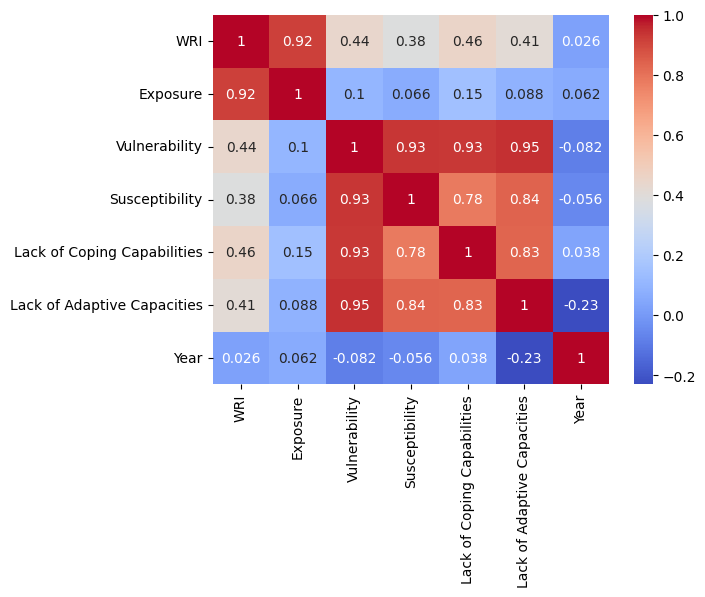

In [32]:
sns.heatmap(df_tog.corr(), annot=True, cmap='coolwarm')

In [33]:
df_tog.describe()

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year
count,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1916.000000,1917.000000
mean,7.551763,15.388336,48.075759,30.739431,70.438289,43.090511,2016.049557
std,5.553257,10.240135,13.835666,15.667030,15.038854,13.551156,3.182045
min,0.020000,0.050000,14.310000,8.260000,31.590000,11.160000,2011.000000
25%,3.740000,10.160000,37.040000,17.790000,59.330000,33.192500,2013.000000
50%,6.520000,12.760000,47.100000,25.400000,74.230000,43.080000,2016.000000
75%,9.400000,16.450000,60.060000,42.640000,83.000000,53.065000,2019.000000
max,56.710000,99.880000,76.470000,70.830000,94.360000,76.110000,2021.000000


**Visualizing the dispersion of data and data extremities**

<AxesSubplot: >

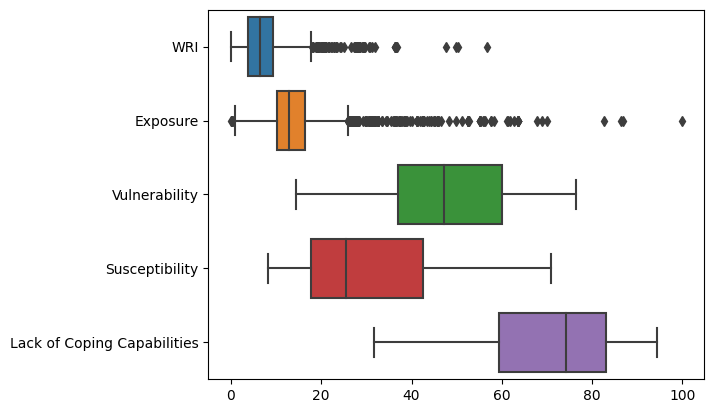

In [34]:
sns.boxplot(data=df_tog[["WRI", "Exposure", "Vulnerability", "Susceptibility", "Lack of Coping Capabilities"]], orient="h")

In [35]:
df_tog['Country name'].value_counts()

Afghanistan                         11
Nicaragua                           11
Moldova (the Republic of)           11
Mongolia                            11
Mozambique                          11
                                    ..
Maldives                             3
Micronesia (Federated States of)     3
Montenegro                           3
Saint Vincent and the Grenadines     3
Dominica                             2
Name: Country name, Length: 181, dtype: int64

In [36]:
df_tog.sort_values('Susceptibility', ascending=False).head(10)

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category,Alpha-3 code,Country name
1862,7.79,10.20,76.34,70.83,90.88,67.32,2020,Low,High,Very High,Very High,CAF,Central African Republic (the)
1867,7.64,10.08,75.83,70.52,90.56,66.41,2021,Low,Medium,Very High,Very High,CAF,Central African Republic (the)
1863,7.75,10.18,76.13,70.46,90.84,67.09,2019,Low,High,Very High,Very High,CAF,Central African Republic (the)
1868,6.44,8.42,76.47,70.00,90.68,68.73,2018,Very Low,Medium,Very High,Very High,CAF,Central African Republic (the)
1190,14.03,18.49,75.86,69.38,89.54,68.65,2011,Very High,Very High,Very High,Very High,NER,Niger (the)
1112,9.98,13.86,71.95,68.19,86.16,61.52,2011,Medium,High,Very High,Very High,MOZ,Mozambique
335,8.77,11.80,74.28,67.78,92.95,62.12,2020,Low,High,Very High,Very High,COD,Congo (the Democratic Republic of the)
334,8.78,11.86,74.04,67.76,92.80,61.55,2021,Low,High,Very High,Very High,COD,Congo (the Democratic Republic of the)
1113,9.09,12.73,71.37,67.63,84.91,61.58,2012,Medium,High,Very High,Very High,MOZ,Mozambique
419,5.62,7.77,72.38,67.61,89.07,60.46,2018,Very Low,Medium,Very High,Very High,ERI,Eritrea


In [37]:
df_tog.sort_values('Susceptibility', ascending=True).head(10)

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category,Alpha-3 code,Country name
792,0.36,1.02,35.48,8.26,59.07,39.13,2018,Very Low,Very Low,Low,Very Low,QAT,Qatar
791,0.31,0.91,34.33,8.32,64.58,30.08,2020,Very Low,Very Low,Low,Very Low,QAT,Qatar
789,0.31,0.90,34.35,8.75,66.29,28.01,2019,Very Low,Very Low,Low,Very Low,QAT,Qatar
1322,0.08,0.28,30.30,8.97,44.76,37.16,2014,Very Low,Very Low,Very Low,Very Low,QAT,Qatar
793,0.30,0.85,34.80,9.03,65.03,30.34,2021,Very Low,Very Low,Low,Very Low,QAT,Qatar
796,0.08,0.28,30.13,9.04,44.88,36.47,2015,Very Low,Very Low,Very Low,Very Low,QAT,Qatar
795,0.09,0.28,32.25,9.36,49.03,38.36,2017,Very Low,Very Low,Very Low,Very Low,QAT,Qatar
794,0.02,0.05,33.18,9.40,52.12,38.03,2011,Very Low,Very Low,Very Low,Very Low,QAT,Qatar
1823,3.66,11.07,33.10,9.47,63.26,26.58,2019,Low,Low,Low,Very Low,ARE,United Arab Emirates (the)
788,0.10,0.28,36.46,9.50,56.15,43.73,2013,Very Low,Very Low,Very Low,Very Low,QAT,Qatar


In [44]:
df_spain = df_tog[df_tog['Country name'] == 'Spain']
df_spain

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category,Alpha-3 code,Country name
1503,3.05,10.23,29.79,16.71,48.75,23.92,2016,Low,Very Low,Very Low,Very Low,ESP,Spain
1504,3.20,10.23,31.27,16.08,52.00,25.74,2014,Low,Very Low,Very Low,Very Low,ESP,Spain
1505,3.29,10.65,30.87,15.06,49.65,27.91,2011,Low,Very Low,Very Low,Very Low,ESP,Spain
1506,3.62,11.77,30.73,15.86,58.22,18.11,2021,Low,Low,Very Low,Very Low,ESP,Spain
1507,3.46,11.75,29.42,15.74,57.26,15.25,2019,Low,Low,Very Low,Very Low,ESP,Spain
1508,3.10,10.23,30.31,16.64,48.71,25.58,2015,Low,Very Low,Very Low,Very Low,ESP,Spain
1509,2.80,9.97,28.12,16.45,51.64,16.27,2018,Low,Very Low,Very Low,Very Low,ESP,Spain
1510,3.23,10.23,31.53,15.95,50.00,28.65,2017,Low,Very Low,Very Low,Very Low,ESP,Spain
1511,3.38,10.23,33.00,15.25,49.68,34.08,2013,Low,Very Low,Very Low,Very Low,ESP,Spain
1512,3.40,10.23,33.28,15.07,50.87,33.91,2012,Low,Very Low,Very Low,Very Low,ESP,Spain


In [45]:
df_tog.sort_values('Exposure', ascending=False).head(10)

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category,Alpha-3 code,Country name
1792,56.71,99.88,56.78,35.32,84.36,50.66,2019,Very High,Very High,High,High,VUT,Vanuatu
1793,49.74,86.77,57.32,38.81,80.73,52.42,2020,Very High,Very High,High,High,VUT,Vanuatu
1797,50.28,86.46,58.15,36.07,86.37,52.00,2018,Very High,Very High,High,High,VUT,Vanuatu
1795,47.73,82.55,57.82,39.66,81.21,52.59,2021,Very High,Very High,High,High,VUT,Vanuatu
46,30.80,69.95,44.03,23.38,76.65,32.05,2019,Very High,Very High,Medium,Medium,ATG,Antigua and Barbuda
44,27.44,68.92,39.82,23.33,63.31,32.83,2020,Very High,Very High,Low,Medium,ATG,Antigua and Barbuda
45,27.28,67.73,40.28,23.80,64.41,32.62,2021,Very High,Very High,Low,Medium,ATG,Antigua and Barbuda
1796,36.50,63.66,57.34,36.40,81.16,54.45,2014,Very High,Very High,High,High,VUT,Vanuatu
1791,36.43,63.66,57.23,34.66,81.27,55.77,2013,Very High,Very High,High,High,VUT,Vanuatu
1790,36.31,63.66,57.04,34.17,81.19,55.78,2012,Very High,Very High,High,High,VUT,Vanuatu


In [46]:
df_tog.sort_values('Lack of Coping Capabilities', ascending=False).head(10)

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category,Alpha-3 code,Country name
1685,12.25,16.30,75.14,64.28,94.36,66.78,2011,High,Very High,Very High,Very High,TCD,Chad
728,5.50,8.03,68.47,42.32,94.14,68.95,2019,Very Low,Medium,Very High,High,YEM,Yemen
9,14.06,18.45,76.19,61.09,93.94,73.55,2011,Very High,Very High,Very High,Very High,AFG,Afghanistan
731,5.68,8.13,69.87,46.10,93.80,69.72,2020,Very Low,Medium,Very High,Very High,YEM,Yemen
4,9.93,13.17,75.41,56.67,93.44,76.11,2013,Medium,High,Very High,Very High,AFG,Afghanistan
5,9.71,13.17,73.73,55.93,93.37,71.89,2014,Medium,High,Very High,Very High,AFG,Afghanistan
724,5.72,8.27,69.12,44.85,93.17,69.34,2021,Very Low,Medium,Very High,High,YEM,Yemen
1531,8.08,11.86,68.15,52.44,93.05,58.96,2014,Medium,High,Very High,Very High,SDN,Sudan (the)
1681,11.90,15.92,74.78,63.36,93.02,67.97,2019,High,Very High,Very High,Very High,TCD,Chad
335,8.77,11.80,74.28,67.78,92.95,62.12,2020,Low,High,Very High,Very High,COD,Congo (the Democratic Republic of the)


In [47]:
df_tog.sort_values('Lack of Adaptive Capacities', ascending=True).head(10)

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category,Alpha-3 code,Country name
675,1.71,7.16,23.88,13.82,46.66,11.16,2019,Very Low,Very Low,Very Low,Very Low,ISL,Iceland
1913,2.87,13.18,21.75,13.63,39.27,12.34,2019,Medium,Very Low,NaN,Very Low,AUT,Austria
341,2.43,11.51,21.11,14.30,36.44,12.60,2019,Low,Very Low,NaN,Very Low,DEU,Germany
375,2.65,11.79,22.49,14.50,40.32,12.65,2019,Low,Very Low,Very Low,Very Low,DNK,Denmark
1910,2.92,13.91,20.97,14.41,35.16,13.33,2018,Medium,Very Low,Very Low,Very Low,AUT,Austria
340,2.42,11.31,21.36,15.09,35.38,13.60,2018,Low,Very Low,Very Low,Very Low,DEU,Germany
146,2.79,11.42,24.39,14.29,45.26,13.61,2019,Low,Very Low,Very Low,Very Low,BEL,Belgium
1216,2.34,10.60,22.06,13.29,39.21,13.68,2019,Low,Very Low,NaN,Very Low,NOR,Norway
1182,7.35,31.73,23.15,14.20,41.53,13.71,2019,Very High,Medium,Very Low,Very Low,NLD,Netherlands (the)
468,2.34,9.48,24.66,16.94,43.22,13.83,2018,Very Low,Very Low,Very Low,Very Low,FRA,France


**Checking data types**

In [48]:
df_by_country = df_tog.drop(columns =['Exposure Category', 'WRI Category', 'Vulnerability Category','Susceptibility Category'])

df_by_country.dtypes

WRI                            float64
Exposure                       float64
Vulnerability                  float64
Susceptibility                 float64
Lack of Coping Capabilities    float64
Lack of Adaptive Capacities    float64
Year                             int64
Alpha-3 code                    object
Country name                    object
dtype: object

In [30]:
#I would have to change it if I had removed the NaN because it would have converted it to an object
#df_by_country['Lack of Adaptive Capacities'] = df_by_country['Lack of Adaptive Capacities'].astype(float)

**To analyse each country performance I created a new column, WRI diff, which is the result of the calculation of the difference of WRI over the years (2011-2021) for each country  
Countries with a negative WRI diff means that they are improving over the years  
Another column was created to show the percentage of change of the WRI over the years. I then grouped by the country name and calculated the mean WRI diff**

In [49]:
df_by_country['WRI diff'] = df_by_country[['Alpha-3 code', 'Year', 'WRI']].sort_values('Year').groupby('Alpha-3 code').diff()['WRI']
df_by_country['WRI pct change'] = df_by_country[['Alpha-3 code', 'Year', 'WRI']].sort_values('Year').groupby('Alpha-3 code').pct_change()['WRI']
df_wri_agg = df_by_country.groupby(['Alpha-3 code', 'Country name']).mean().sort_values('WRI diff', ascending=False)
df_wri_agg

,,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,WRI diff,WRI pct change
Alpha-3 code,Country name,,,,,,,,,
VUT,Vanuatu,41.377273,72.177273,57.310909,36.180000,81.740000,54.013636,2016.0,1.573,0.048264
KIR,Kiribati,6.597273,11.450909,57.593636,41.425455,83.043636,48.312727,2016.0,1.326,0.768124
GUY,Guyana,15.414545,30.421818,50.705455,28.010000,78.583636,45.524545,2016.0,1.281,0.122814
BRN,Brunei Darussalam,17.906364,46.271818,38.794545,15.658182,64.970000,35.754545,2016.0,0.869,0.051412
URY,Uruguay,6.280909,17.799091,35.627273,20.174545,51.881818,34.826364,2016.0,0.859,0.258508
...,...,...,...,...,...,...,...,...,...,...
MDG,Madagascar,11.223636,16.154545,69.450909,65.879091,84.542727,57.932727,2016.0,-0.402,-0.028961
AFG,Afghanistan,9.887273,13.812727,71.460909,54.041818,92.576364,67.766364,2016.0,-0.588,-0.046864
BTN,Bhutan,7.070909,13.548182,51.307273,29.285455,74.555455,50.080000,2016.0,-1.040,-0.104717


**Calculating how long it would take for the countries to reach WRI zero**

In [50]:
df_wri_agg['years until WRI 0'] = df_wri_agg['WRI'] / df_wri_agg['WRI diff'] * -1
df_wri_agg.loc[df_wri_agg['years until WRI 0'] < 0, 'years until WRI 0'] = np.inf
# Countries showing the fastest improvement in WRI
df_wri_agg.tail(10).sort_values('WRI diff')

,,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,WRI diff,WRI pct change,years until WRI 0
Alpha-3 code,Country name,,,,,,,,,,
ATG,Antigua and Barbuda,28.506667,68.866667,41.376667,23.503333,68.123333,32.500000,2020.000000,-1.760,-0.057461,16.196970
DMA,Dominica,27.945000,62.240000,44.895000,24.770000,71.170000,38.745000,2020.500000,-1.050,-0.036881,26.614286
BTN,Bhutan,7.070909,13.548182,51.307273,29.285455,74.555455,50.080000,2016.000000,-1.040,-0.104717,6.798951
AFG,Afghanistan,9.887273,13.812727,71.460909,54.041818,92.576364,67.766364,2016.000000,-0.588,-0.046864,16.815090
MDG,Madagascar,11.223636,16.154545,69.450909,65.879091,84.542727,57.932727,2016.000000,-0.402,-0.028961,27.919493
WSM,Samoa,5.887143,11.994286,49.047143,26.990000,76.871429,43.274286,2016.285714,-0.390,-0.020878,15.095238
PHL,Philippines (the),25.329091,48.790909,51.811818,31.712727,81.211818,42.509091,2016.000000,-0.293,-0.009318,86.447409
MUS,Mauritius,13.137273,32.952727,39.757273,18.293636,60.989091,39.992727,2016.000000,-0.287,-0.016144,45.774469
STP,Sao Tome and Principe,3.020000,5.253333,57.330000,45.526667,77.115000,49.346667,2016.000000,-0.232,-0.065525,13.017241


In [51]:
# Countries showing the worst average increase in WRI
df_wri_agg.head(10)

,,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,WRI diff,WRI pct change,years until WRI 0
Alpha-3 code,Country name,,,,,,,,,,
VUT,Vanuatu,41.377273,72.177273,57.310909,36.180000,81.740000,54.013636,2016.0,1.573,0.048264,inf
KIR,Kiribati,6.597273,11.450909,57.593636,41.425455,83.043636,48.312727,2016.0,1.326,0.768124,inf
GUY,Guyana,15.414545,30.421818,50.705455,28.010000,78.583636,45.524545,2016.0,1.281,0.122814,inf
BRN,Brunei Darussalam,17.906364,46.271818,38.794545,15.658182,64.970000,35.754545,2016.0,0.869,0.051412,inf
URY,Uruguay,6.280909,17.799091,35.627273,20.174545,51.881818,34.826364,2016.0,0.859,0.258508,inf
DJI,Djibouti,11.734545,19.150909,61.391818,38.468182,83.219091,62.483636,2016.0,0.843,0.093237,inf
CPV,Cabo Verde,12.502727,24.987273,50.717273,33.247273,71.047273,47.862727,2016.0,0.825,0.075942,inf
COM,Comoros (the),9.484545,14.543636,66.073636,53.371818,84.311818,60.536364,2016.0,0.798,0.096711,inf
SLB,Solomon Islands,22.200909,35.779091,62.199091,45.072727,83.784545,57.737273,2016.0,0.765,0.041986,inf


In [52]:
df_wri_agg.loc['BRA']

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,WRI diff,WRI pct change,years until WRI 0
Country name,,,,,,,,,,
Brazil,4.415455,10.116364,43.708182,24.043636,69.751818,37.33,2016.0,0.071,0.016333,inf


In [53]:
df_tog[df_tog['Alpha-3 code'] == 'URY'].sort_values('Year')

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category,Alpha-3 code,Country name
1778,3.94,10.84,36.35,21.19,50.74,37.13,2011,Low,Low,Low,Low,URY,Uruguay
1774,4.12,11.10,37.06,20.69,51.31,39.19,2012,Low,Low,Low,Low,URY,Uruguay
1769,4.09,11.10,36.84,20.57,50.87,39.09,2013,Low,Low,Low,Low,URY,Uruguay
1771,4.00,11.10,36.05,21.56,50.80,35.78,2014,Low,Low,Low,Low,URY,Uruguay
1773,3.93,11.10,35.41,20.26,50.71,35.27,2015,Low,Low,Low,Low,URY,Uruguay
1776,4.03,11.10,36.29,20.22,50.23,38.42,2016,Low,Low,Low,Low,URY,Uruguay
1777,4.03,11.10,36.33,20.66,50.78,37.55,2017,Low,Low,Low,Low,URY,Uruguay
1775,3.36,10.06,33.42,19.50,50.59,30.17,2018,Low,Low,Low,Low,URY,Uruguay
1772,12.52,36.03,34.76,18.82,56.57,28.88,2019,Very High,Very High,Low,Low,URY,Uruguay
1768,12.54,36.29,34.56,19.23,53.85,30.60,2020,Very High,Very High,Low,Low,URY,Uruguay


In [54]:
import matplotlib.pyplot as plt
import geopandas
import folium

**Creating a map to show the average change of WRI over the years  
Other maps availabe at Tableau: https://public.tableau.com/app/profile/fernanda8216/viz/WRI_16807086467990/WRIoveryears2011-2021  
https://public.tableau.com/views/AverageWRIdiff/Dashboard1?:language=en-GB&:display_count=n&:origin=viz_share_link**

In [55]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

df_diff_map = world.merge(df_wri_agg, how="left", left_on=['iso_a3'], right_on=['Alpha-3 code'])

my_map = folium.Map()

folium.Choropleth(
    geo_data=df_diff_map,
    name='choropleth',
    data=df_diff_map,
    columns=['iso_a3', 'WRI diff'],
    key_on='feature.properties.iso_a3',
    fill_color='YlOrRd',
    nan_fill_color='Grey',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average change of WRI per year between 2011-2021'
).add_to(my_map)
my_map.save('wri.html')

my_map

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

In [49]:
!pip install openpyxl


[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
#Exporting to make the map on Tableau:
df_wri_agg.to_excel(r'C:\Users\nanda\PDA Data Science Edinburgh college/aggdata_tableau.xlsx', index=False)

In [88]:
#Checking why some countries are missing on the map (they aren't on the dataframe)
df_tog[df_tog['Alpha-3 code'] == 'NCL']

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category,Alpha-3 code,Country name
